In [52]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import torch 
from torchvision import datasets,transforms
import torchvision
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [53]:
trans = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))]
                   )
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, 
                   download=True, 
                   transform=trans,), 
                   batch_size=100, 
                   shuffle=True, 
                   num_workers=1,
                  
)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', 
                   train=False,
                   download=True,
                   transform = trans,),
                   batch_size=100,
                   shuffle=True,
                   num_workers=1,
)

In [54]:
iter(train_loader).next()

[
 ( 0 , 0 ,.,.) = 
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
            ...             ⋱             ...          
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
       ⋮  
 
 ( 1 , 0 ,.,.) = 
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
            ...             ⋱             ...          
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
       ⋮  
 
 ( 2 , 0 ,.,.) = 
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242  ...  -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4

torch.Size([100, 1, 28, 28])


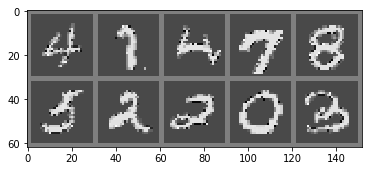

[ 4 ,   1 ,   4 ,   7 ,   8 ,   5 ,   2 ,   2 ,   0 ,   3 ]


In [55]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
def imshow(img):
#     if use_gpu: img=img.cpu()
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
#     Permute the axes 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# trainloader, classes = get_data()
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.size())
images, labels = images[0:10], labels[0:10]

imshow(torchvision.utils.make_grid(images, nrow=5))
print(" ".join("%3s" % list(labels)))#classes[labels[j]] for j in range(len(labels))))

In [56]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable

def resize2d(img, size):
    return (F.adaptive_avg_pool2d(Variable(img,volatile=True), size)).data

In [57]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [58]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [59]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [60]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
 0.1492 -0.1206 -0.0595  0.0051  0.1537  0.0095 -0.0854 -0.0774 -0.1085  0.0807
[torch.FloatTensor of size 1x10]



In [61]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [62]:
output = net(input)
target = Variable(torch.arange(1, 11))  # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)


Variable containing:
 38.6718
[torch.FloatTensor of size 1]



In [63]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)


conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
 -2.8409
  0.4533
 -3.9354
 -4.8228
  2.5585
  8.9464
[torch.FloatTensor of size 6]



In [64]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)


In [65]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [66]:
batch_size = 100
num_epochs = 10
for s in range(num_epochs):
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs = img = resize2d(inputs, (32,32))
        inputs, labels = Variable(inputs), Variable(labels)
        

        # zero the parameter gradients
        net.zero_grad()
    
        optimizer.zero_grad()

        # forward + backward + optimize
        #print(inputs)
        #inputs = inputs.view(100,-1)
        outputs = net(inputs)
    
        target = Variable(torch.zeros(100, 10))  # a dummy target, for example
    
        for k in range(100):
            m = int(labels[k])
            target[k,m] = 1
        loss = criterion(outputs,target)
        loss.backward()
        optimizer.step()

In [67]:
dataiter2 = iter(test_loader)
inputst, labelst = dataiter2.next()

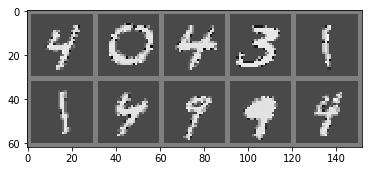

[ 4 ,   0 ,   4 ,   3 ,   1 ,   1 ,   4 ,   9 ,   9 ,   4 ]


In [68]:
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
def imshow(img):
#     if use_gpu: img=img.cpu()
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
#     Permute the axes 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# testloader, classes = get_data()
inputst1, labelst1 = inputst[0:10], labelst[0:10]
imshow(torchvision.utils.make_grid(inputst1, nrow=5))
print(" ".join("%3s" % list(labelst1)))#classes[labels[j]] for j in range(len(labels))))

In [69]:
inputst1 = resize2d(inputst1, (32,32))
inputst1, labelst1 = Variable(inputst1), Variable(labelst1)

# zero the parameter gradients
net.zero_grad()

#inputst1 = inputst1.view(10,-1)



# forward + backward + optimize

outputst1 = net(inputst1)

In [70]:
outputst1

Variable containing:
 0.0274 -0.0003 -0.0185 -0.0893  0.9620  0.1043  0.0336 -0.0233 -0.0455  0.1459
 0.7750  0.0259  0.1264 -0.2438  0.0040  0.1856  0.0972 -0.0240 -0.1634 -0.0972
-0.0283 -0.0257 -0.1524 -0.0341  1.1073  0.0465  0.0138  0.0415  0.0077  0.2230
-0.1138 -0.0403 -0.0662  1.0457 -0.0622  0.1450 -0.0438 -0.0471 -0.0424 -0.0044
-0.0068  0.7128 -0.0223 -0.0970  0.0389  0.0681  0.0863 -0.0411  0.1538  0.0089
-0.0020  0.7901 -0.0234  0.1755  0.0485 -0.0343 -0.0099  0.0292 -0.0188  0.0567
-0.0522 -0.0346 -0.0015 -0.0069  0.5098  0.0105  0.0715  0.0749  0.2871  0.3714
-0.0016  0.1160 -0.1058  0.0265 -0.0015  0.1225 -0.1040  0.5134  0.1638  0.3018
-0.0422 -0.0014 -0.0632 -0.0726  0.4889  0.0275  0.0809 -0.0066  0.0480  0.6946
 0.0213  0.1022 -0.1185 -0.0273  0.5581  0.0597  0.0592 -0.0110  0.1504  0.4042
[torch.FloatTensor of size 10x10]

In [71]:
_,predicted = torch.max(outputst1.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))


Predicted:      4     0     4     3     1     1     4     7     9     4


In [72]:
correct = 0
total = 0
for i, data in enumerate(test_loader, 0):
    images, labels = data
    #images = images.view(100,-1)
    images = resize2d(images, (32,32))
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

In [73]:
print('Accuracy of the network on the 600 test images: %f %%' % (100 * correct / total))

Accuracy of the network on the 600 test images: 91.700000 %


In [74]:
dataiter2 = iter(train_loader)
inputst, labelst = dataiter2.next()

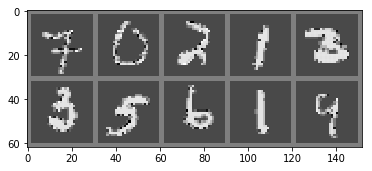

[ 7 ,   0 ,   2 ,   1 ,   3 ,   3 ,   5 ,   6 ,   1 ,   9 ]


In [75]:
inputst1, labelst1 = inputst[0:10], labelst[0:10]
imshow(torchvision.utils.make_grid(inputst1, nrow=5))
print(" ".join("%3s" % list(labelst1)))#classes[labels[j]] for j in range(len(labels))))

In [76]:
inputst1 = resize2d(inputst1, (32,32))
inputst1, labelst1 = Variable(inputst1), Variable(labelst1)

In [77]:
net(inputst1)

Variable containing:
-0.0227  0.1055 -0.0124  0.0745  0.1583 -0.0094 -0.0072  0.4723 -0.0413  0.2245
 0.6994  0.0290 -0.0437 -0.0567  0.1072  0.0791  0.0273  0.0300  0.0099  0.0868
 0.0424  0.0962  1.0324 -0.0806  0.0073 -0.0449 -0.0908  0.0490  0.0441  0.0259
-0.0282  1.1320 -0.1107  0.0222  0.0042 -0.0081  0.0395  0.0573 -0.0066  0.0189
-0.0814 -0.1113  0.4484  0.2376 -0.0618  0.0543  0.3823  0.1873  0.1193  0.0580
 0.0819 -0.0450  0.3042  0.2530 -0.1416  0.1223  0.4485  0.0453 -0.1076  0.0850
-0.0259 -0.0656 -0.1433  0.1304  0.0579  0.6963 -0.1567  0.0977  0.0609  0.2629
-0.1375  0.0077  0.0736 -0.0134  0.1913  0.0600  0.8906 -0.0833  0.0228 -0.2132
-0.0051  1.0277 -0.0211 -0.0314  0.0115 -0.0488  0.0196 -0.0408  0.1157 -0.0518
 0.0428  0.0601 -0.0309  0.2657  0.2386  0.0234 -0.0605  0.0414 -0.0476  0.2930
[torch.FloatTensor of size 10x10]

In [82]:
correct = 0
total = 0
for i, data in enumerate(train_loader, 0):
    images, labels = data
    images = resize2d(images, (32,32))
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

In [83]:
print('Accuracy of the network on the 600 test images: %f %%' % (100 * correct / total))

Accuracy of the network on the 600 test images: 91.150000 %
